### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN-1D + LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego la transpuesta

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 3))
x_test = x_test.reshape((n_samples_test, 1, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 3)
(288, 1, 22, 3)


In [0]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 3, 22)
(288, 1, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 58us/sample - loss: 1.8744 - acc: 0.4444
kappa:  0.2592592592592593
confusion matrix:
 [[27 23  9 13]
 [12 32 17 11]
 [10 15 34 13]
 [11 10 16 35]]
(0.4458698830409357, 0.4444444444444444, 0.4439285278101068, None)


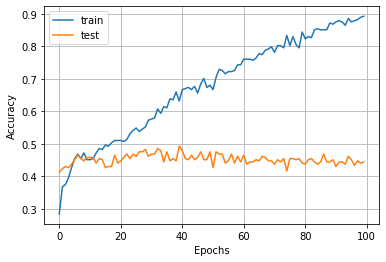

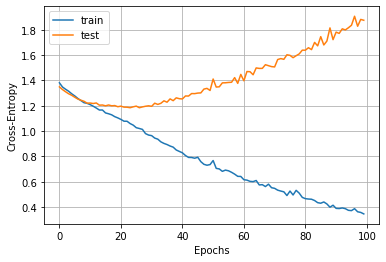

Iteration: 2
288/288 [==============================] - 0s 85us/sample - loss: 1.8814 - acc: 0.4340
kappa:  0.24537037037037035
confusion matrix:
 [[29 22 16  5]
 [ 3 28 26 15]
 [11 15 35 11]
 [ 7 10 22 33]]
(0.45562342171717174, 0.4340277777777778, 0.43775326495280314, None)


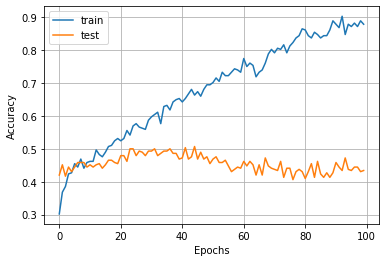

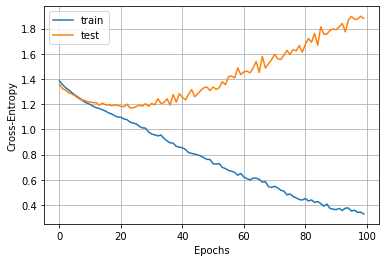

Iteration: 3
288/288 [==============================] - 0s 62us/sample - loss: 1.8320 - acc: 0.4236
kappa:  0.2314814814814815
confusion matrix:
 [[27 24 10 11]
 [ 8 30 20 14]
 [11 10 30 21]
 [11 10 16 35]]
(0.4264813058672708, 0.42361111111111116, 0.42312132513676654, None)


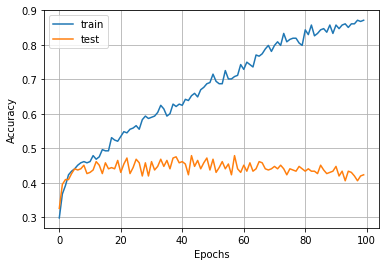

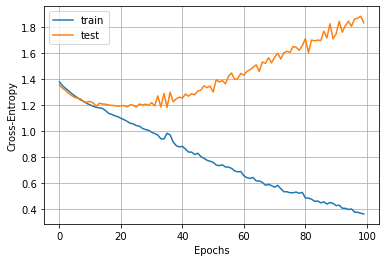

Iteration: 4
288/288 [==============================] - 0s 50us/sample - loss: 1.9404 - acc: 0.4375
kappa:  0.25
confusion matrix:
 [[24 25 11 12]
 [10 30 15 17]
 [10 11 29 22]
 [12  5 12 43]]
(0.43534731731129866, 0.4375, 0.43247972394685147, None)


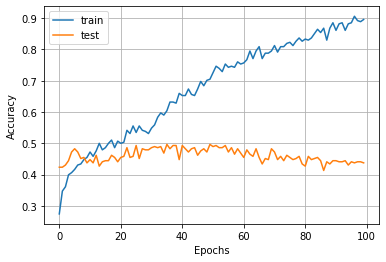

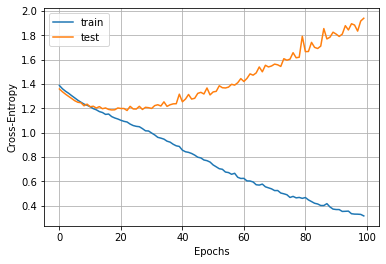

Iteration: 5
288/288 [==============================] - 0s 67us/sample - loss: 1.9104 - acc: 0.4062
kappa:  0.20833333333333337
confusion matrix:
 [[32 19 13  8]
 [ 9 24 24 15]
 [11 14 35 12]
 [13  9 24 26]]
(0.4116892243685277, 0.40625, 0.40565587047593593, None)


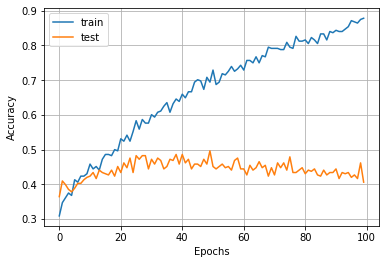

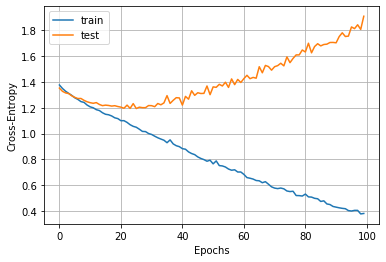

Iteration: 6
288/288 [==============================] - 0s 51us/sample - loss: 1.7829 - acc: 0.4444
kappa:  0.2592592592592593
confusion matrix:
 [[30 22 12  8]
 [ 6 28 26 12]
 [ 8 13 40 11]
 [10  9 23 30]]
(0.4580718317733413, 0.4444444444444445, 0.4446587325732443, None)


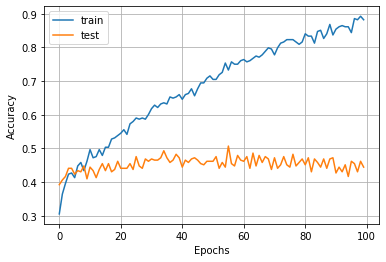

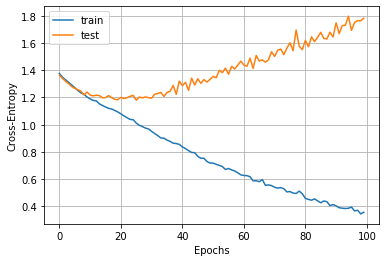

Iteration: 7
288/288 [==============================] - 0s 65us/sample - loss: 1.8562 - acc: 0.4688
kappa:  0.29166666666666663
confusion matrix:
 [[34 22  7  9]
 [ 5 32 15 20]
 [ 9 14 35 14]
 [ 8  8 22 34]]
(0.47819797624094756, 0.46875, 0.47090860757475106, None)


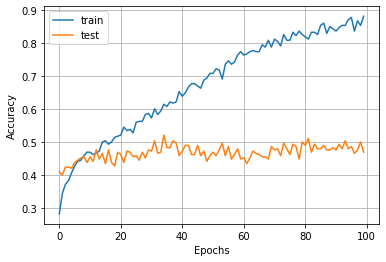

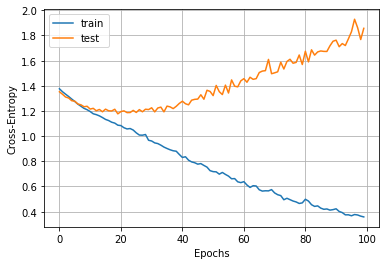

Iteration: 8
288/288 [==============================] - 0s 57us/sample - loss: 1.9042 - acc: 0.4236
kappa:  0.2314814814814815
confusion matrix:
 [[31 16 15 10]
 [ 4 25 29 14]
 [ 7 15 39 11]
 [12 10 23 27]]
(0.4390675880328954, 0.4236111111111111, 0.42389241361526975, None)


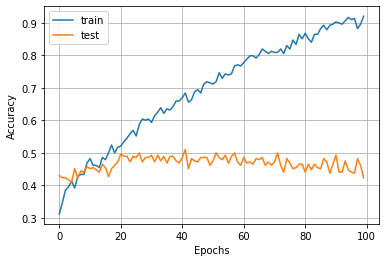

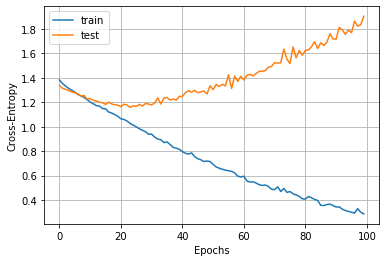

Iteration: 9
288/288 [==============================] - 0s 50us/sample - loss: 1.7971 - acc: 0.4444
kappa:  0.2592592592592593
confusion matrix:
 [[28 22 12 10]
 [ 9 26 20 17]
 [10 11 36 15]
 [ 8  6 20 38]]
(0.4482954545454545, 0.4444444444444444, 0.44262673142134606, None)


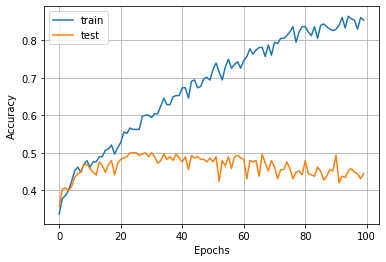

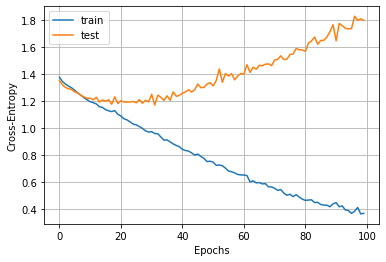

Iteration: 10
288/288 [==============================] - 0s 56us/sample - loss: 2.0122 - acc: 0.4340
kappa:  0.24537037037037035
confusion matrix:
 [[31 21 11  9]
 [ 9 27 24 12]
 [12 16 37  7]
 [13  9 20 30]]
(0.4415503457438825, 0.4340277777777778, 0.4344316278406448, None)


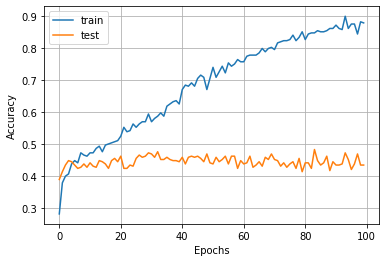

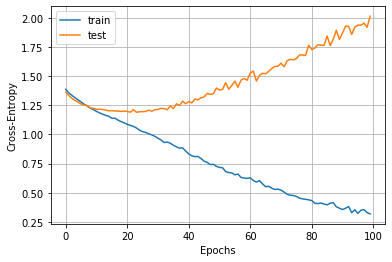


Resultados:
loss: [1.874400920338101, 1.8814268112182617, 1.8319988515641954, 1.9404241111543443, 1.9104118082258437, 1.7829491827223036, 1.8562178876664903, 1.9041805797153049, 1.7970574961768255, 2.012235641479492]
accuracy: [0.44444445, 0.4340278, 0.4236111, 0.4375, 0.40625, 0.44444445, 0.46875, 0.4236111, 0.44444445, 0.4340278]
kappa: [0.2592592592592593, 0.24537037037037035, 0.2314814814814815, 0.25, 0.20833333333333337, 0.2592592592592593, 0.29166666666666663, 0.2314814814814815, 0.2592592592592593, 0.24537037037037035]
precision: [0.4458698830409357, 0.45562342171717174, 0.4264813058672708, 0.43534731731129866, 0.4116892243685277, 0.4580718317733413, 0.47819797624094756, 0.4390675880328954, 0.4482954545454545, 0.4415503457438825]
recall: [0.4444444444444444, 0.4340277777777778, 0.42361111111111116, 0.4375, 0.40625, 0.4444444444444445, 0.46875, 0.4236111111111111, 0.4444444444444444, 0.4340277777777778]
f1: [0.4439285278101068, 0.43775326495280314, 0.42312132513676654, 0.4324797

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,3,22)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_18 (TimeDis (None, None, 1, 32)       2144      
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 32)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 27,236
Trainable params: 27,236
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4361
std: (+/- 0.0158)
kappa: 0.2481
std: 0.0210
precision: 0.4440
recall: 0.4361
f1: 0.4359
